In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [2]:
#Read the data set
data1=pd.read_excel("Inventory Dataset.xlsx")
data1

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
351,064-18-9909,2023-06-17,12
352,064-18-9962,2023-06-17,19
353,064-18-0790,2023-06-17,5
354,064-18-3316,2023-06-17,7354


In [3]:
print("The Inventory dataset contains {} rows and {} columns.".format(data1.shape[0],data1.shape[1]))

The Inventory dataset contains 356 rows and 3 columns.


In [4]:
#Renaming Columns
data1.rename(columns={'Item Number': 'item_number', 'Date': 'date','Inventory':'inventory'}, inplace=True) 

In [5]:
len(data1['item_number'].unique())

356

In [6]:
data2=pd.read_excel("New Inventory.xlsx")
data2

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [7]:
print("The New inventory dataset contains {} rows and {} columns.".format(data2.shape[0],data2.shape[1]))

The New inventory dataset contains 1039 rows and 3 columns.


In [8]:
#Renaming Columns
data2.rename(columns={'Item Number': 'item_number', 'Inventory Receive': 'receive_date','Total Item Qty':'total_quantity'}, inplace=True) 

In [9]:
len(data2['item_number'].unique())

213

In [10]:
len(data2['receive_date'].unique())

23

# Exploratory data analysis

In [11]:
data1.shape

(356, 3)

In [12]:
data2.shape

(1039, 3)

In [13]:
data1.describe()

,inventory
count,356.000000
mean,3898.971910
std,5325.313247
min,1.000000
25%,9.000000
50%,467.500000
75%,6819.000000
max,27104.000000


In [14]:
data2.describe()

,total_quantity
count,1039.000000
mean,2393.439846
std,2513.943204
min,0.000000
25%,980.000000
50%,1664.000000
75%,2800.000000
max,23580.000000


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   item_number  356 non-null    object        
 1   date         356 non-null    datetime64[ns]
 2   inventory    356 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.5+ KB


In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   item_number     1039 non-null   object        
 1   receive_date    1039 non-null   datetime64[ns]
 2   total_quantity  1039 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.5+ KB


In [17]:
data1.isna().sum()

item_number    0
date           0
inventory      0
dtype: int64

In [18]:
data2.isna().sum()

item_number       0
receive_date      0
total_quantity    0
dtype: int64

In [19]:
# Drop duplicate rows
data1.drop_duplicates(keep='last', inplace=True) 
data1.reset_index(drop = True, inplace = True)
data1.shape

(356, 3)

In [20]:
# Drop duplicate rows
data2.drop_duplicates(keep='last', inplace=True) 
data2.reset_index(drop = True, inplace = True)
data2.shape

(1039, 3)

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
data2['receive_date']= pd.to_datetime(data2['receive_date'])
data1['date']=pd.to_datetime(data1['date'])


In [23]:
df_merged = pd.merge(data1, data2, on='item_number', how='outer')
df_merged=df_merged.sort_values(by=['receive_date'],ascending=True,key=lambda x: x.astype(np.int64))

In [24]:
pivot_table = df_merged.pivot_table(values='total_quantity', 
                             index='item_number', 
                             columns='receive_date', 
                             aggfunc='sum', 
                             fill_value=0)


In [25]:
pivot_table.head(10)

receive_date,2023-07-07,2023-07-09,2023-07-10,2023-07-14,2023-07-21,2023-07-28,2023-08-04,2023-08-16,2023-08-18,2023-08-22,...,2023-09-22,2023-09-24,2023-09-29,2023-10-08,2023-10-13,2023-10-22,2023-11-26,2023-12-01,2023-12-08,2023-12-15
item_number,,,,,,,,,,,,,,,,,,,,,
064-01-0003,0,0,0,0,0,0,0,0,0,0,...,0,0,5488,0,1864,0,0,0,0,0
064-01-0005,0,0,0,0,0,0,0,0,0,0,...,0,0,7380,0,2520,0,0,0,0,0
064-01-0012,0,0,0,0,0,0,0,0,0,0,...,0,0,6840,0,3244,0,0,0,0,0
064-01-0013,0,0,0,0,0,0,0,0,0,0,...,0,0,6300,0,1748,0,0,0,0,0
064-01-0016,0,0,0,0,0,0,0,0,0,0,...,0,0,6028,0,1608,0,0,0,0,0
064-01-0017,0,0,0,0,0,0,0,0,0,0,...,0,0,5220,0,916,0,0,0,0,0
064-01-0018,0,0,0,0,0,0,0,0,0,0,...,0,0,5760,0,2164,0,0,0,0,0
064-01-0019,0,0,0,0,0,0,0,0,0,0,...,0,0,7648,0,4056,0,0,0,0,0
064-01-0035,0,0,0,0,0,0,0,0,0,0,...,0,0,5488,0,1864,0,0,0,0,0


In [26]:
for item_num,row in pivot_table.iterrows():
    try:
        on_stock =data1[data1['item_number'] == item_num]['inventory']
        on_stock=int(on_stock)
    except:
        on_stock=0

    for k in pivot_table.columns:
        on_stock=on_stock+row[k]
        row[k]=on_stock

In [27]:
df_merged.columns

Index(['item_number', 'date', 'inventory', 'receive_date', 'total_quantity'], dtype='object')

In [28]:
df_merged["Month"]=df_merged['receive_date'].dt.month

In [29]:
month_total=df_merged.groupby('Month')['total_quantity'].sum()

In [30]:
Inventory_sum=data1['inventory'].sum()
month_total[7]=Inventory_sum
month_total=month_total.sort_index(ascending=True)
month_total=pd.DataFrame(month_total)

In [31]:
item_received=month_total

In [32]:
month_names = [calendar.month_name[i] for i in range(7, 13)]

In [33]:
for x in range(8, 7 + len(month_total['total_quantity'])):
    month_total.loc[x, 'total_quantity'] = month_total.loc[x - 1, 'total_quantity'] + month_total.loc[x, 'total_quantity']

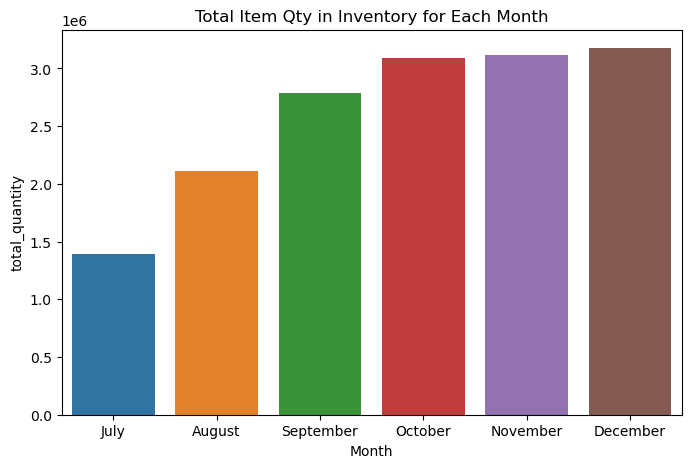

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x=month_names, y=month_total['total_quantity'])

plt.xlabel('Month')
plt.ylabel('total_quantity')
plt.title('Total Item Qty in Inventory for Each Month')
plt.show()

In [35]:
received=df_merged.groupby('Month')['total_quantity'].sum().values
received=list(recived)
received

[698592.0, 726094.0, 670252.0, 303826.0, 24848.0, 63172.0]

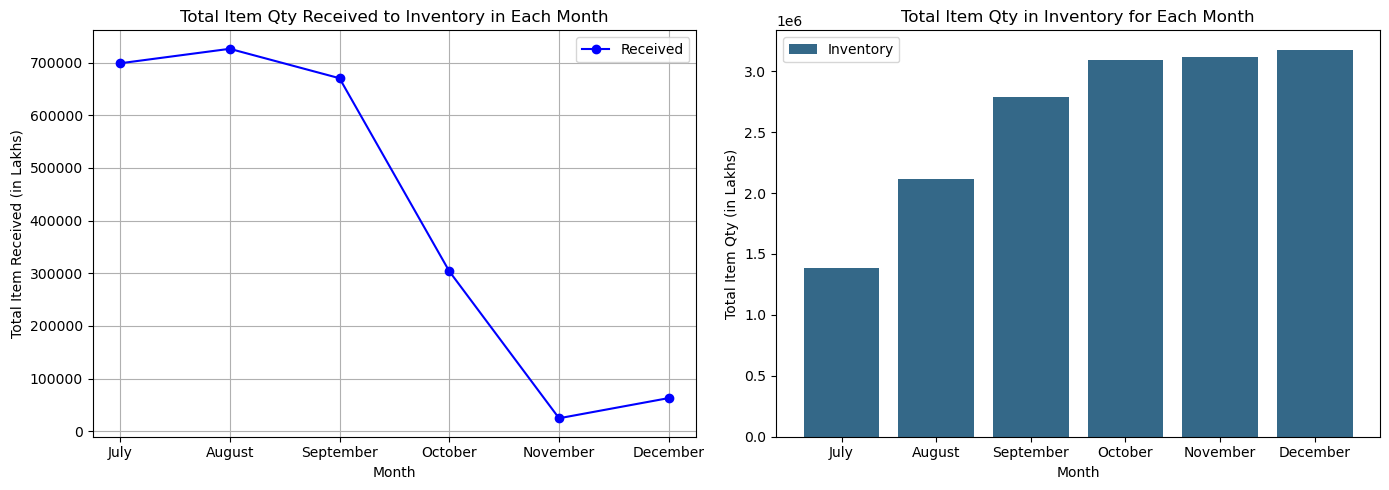

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Line plot
axs[0].plot(month_names, received, marker='o', color='blue', label='Received')
axs[0].set_title('Total Item Qty Received to Inventory in Each Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Item Received (in Lakhs)')
axs[0].grid(True)
axs[0].legend()

# Bar plot
axs[1].bar(month_names, month_total['total_quantity'], color='#346888', label='Inventory')
axs[1].set_title('Total Item Qty in Inventory for Each Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total Item Qty (in Lakhs)')
#axs[1].grid(True)
axs[1].legend()


plt.tight_layout()

# Show the plots
plt.show()

Their interpretation provides valuable insight into inventory trends 
throughout the year. The observation that inventory additions are high in 
October-November and that inventory levels are at their lowest in July 
indicates that there may be a seasonality or pattern in inventory management. 